## Data preparation

In [1]:
import pandas as pd
import numpy as np
#upload the dataset by downloading both datasets from canvas and upload it on colab

data_df = pd.read_csv("dataset_exercise_5_clustering_highway_traffic.csv",sep=";")
data_df

,PORTAL,Date,time_from,time_to,Interval_5,SPEED_MS_AVG,flow
0,"E4S 56,780",20210101,00:00:00,00:05:00,0,18.56,39
1,"E4S 56,780",20210101,00:05:00,00:10:00,1,20.39,18
2,"E4S 56,780",20210101,00:10:00,00:15:00,2,19.27,26
3,"E4S 56,780",20210101,00:15:00,00:20:00,3,19.52,52
4,"E4S 56,780",20210101,00:20:00,00:25:00,4,20.52,52
...,...,...,...,...,...,...,...
104838,"E4S 56,780",20211231,23:35:00,23:40:00,283,19.58,115
104839,"E4S 56,780",20211231,23:40:00,23:45:00,284,19.47,87
104840,"E4S 56,780",20211231,23:45:00,23:50:00,285,19.77,130
104841,"E4S 56,780",20211231,23:50:00,23:55:00,286,18.79,129


In [2]:
# Sort the DataFrame 'data_df' by columns "Date" and "Interval_5"
data_df.sort_values(["Date", "Interval_5"])

# Extract unique dates from the sorted DataFrame
days = np.unique(data_df[['Date']].values.ravel())
# Calculate the total number of unique days
ndays = len(days)

# Group the DataFrame 'data_df' by the "Date" column
day_subsets_df = data_df.groupby(["Date"])

# Define the total number of 5-minute intervals in a day
nintvals = 288

# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)

# Loop through each unique day
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i])

    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame
        df_t = day_subsets_df.get_group(days[i])

        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

# Print the resulting 'vectorized_day_dataset'
print(vectorized_day_dataset)

[[ 39.  18.  26. ...  32.  39.  34.]
 [ 30.  32.  27. ...  44.  41.  39.]
 [ 36.  44.  52. ...  50.  45.  23.]
 ...
 [ 20.  34.  31. ...  38.  42.  36.]
 [ 36.  40.  25. ...  38.  56.  35.]
 [ 33.  32.  34. ... 130. 129. 117.]]


## Data exploration


In [3]:

print('number of nans',np.sum(np.isnan(vectorized_day_dataset)))
print('rate of nans',np.sum(np.isnan(vectorized_day_dataset))/(ndays*nintvals))

number of nans 277
rate of nans 0.0026350837138508373


(288,)


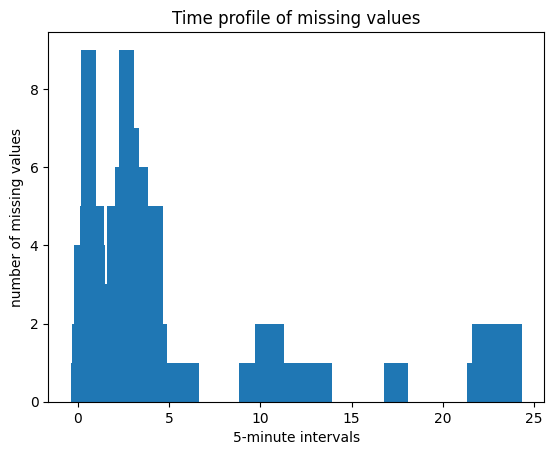

In [4]:
nans_per_time = np.sum(np.isnan(vectorized_day_dataset),0)
print(nans_per_time.shape)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# Create an array 'x_axis' representing the 5-minute intervals
x_axis = np.arange(0, nintvals, 1, dtype=int)
# Initialize an empty list 'x_axis_hours' to store time values in hours
x_axis_hours = []
# Convert interval indices to hours and append them to 'x_axis_hours'
for i in range(0, len(x_axis)):
  x_axis_hours.append(float(x_axis[i]*5)/60)
ax.bar(x_axis_hours,height=nans_per_time)


ax.set_ylabel('number of missing values')
ax.set_xlabel('5-minute intervals')
ax.set_title('Time profile of missing values')

plt.show()

In [5]:
nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
print('number of days with missing value',np.size(np.where(nans_per_day > 0),1))

number of days with missing value 28


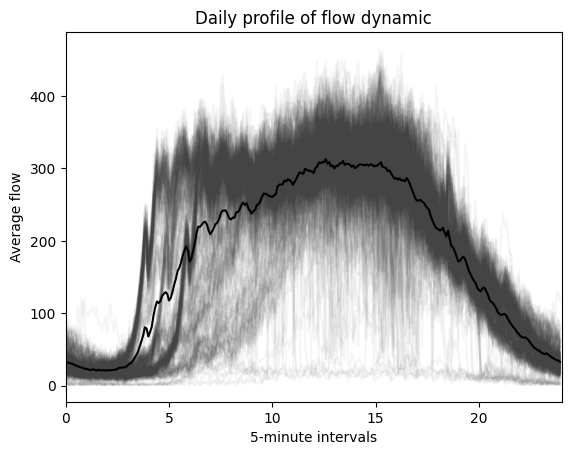

In [6]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()# a convenient way to create a new figure and a set of subplots.
ax.plot(np.array([x_axis_hours,]*ndays).transpose(),vectorized_day_dataset.transpose(),color='#444444',alpha=0.05)
# Above line plots the dataset with specified color and transparency.
ax.plot(x_axis_hours,np.transpose(np.nanmean(vectorized_day_dataset,0)),color='black')
# Above line plots the average of the dataset in black color.

ax.set_ylabel('Average flow')
ax.set_xlabel('5-minute intervals')
plt.xlim(0,24)
ax.set_title('Daily profile of flow dynamic')

plt.show()

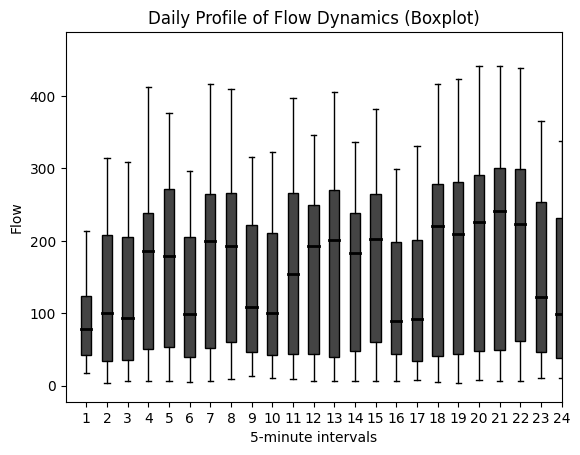

In [7]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()  # This line is a convenient way to create a new figure and a set of subplots.

# Create a boxplot for the dataset
boxplot = ax.boxplot(vectorized_day_dataset.T, patch_artist=True)

# Customize the boxplot appearance
for patch in boxplot['boxes']:
    patch.set_facecolor('#444444')  # Set the box color to gray
for median in boxplot['medians']:
    median.set(color='black', linewidth=2)  # Set median line color to black

# Set the y-axis label
ax.set_ylabel('Flow')

# Set the x-axis label
ax.set_xlabel('5-minute intervals')

# Set the x-axis limits to be between 0 and 24
plt.xlim(0, 24)

# Set the title of the plot
ax.set_title('Daily Profile of Flow Dynamics (Boxplot)')

# Display the plot
plt.show()

In [8]:
import datetime

# Create an array 'day_of_week' to store the day of the week for each unique date
day_of_week = np.zeros((ndays))

# Loop through each unique date
for i in range(0, ndays):
    # Parse the current date from a string to a datetime object
    day_dt = datetime.datetime.strptime(str(days[i]), '%Y%m%d')

    # Get the day of the week (1 for Monday, 2 for Tuesday, ..., 7 for Sunday)
    day_of_week[i] = day_dt.isoweekday()

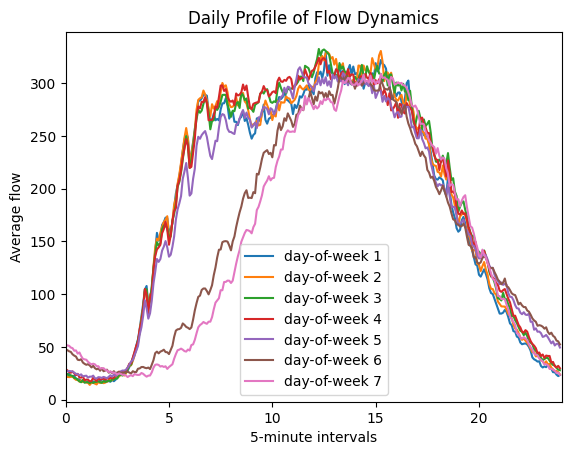

In [9]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()

# Iterate through each day of the week (from 1 to 7)
for i in range(1, 8):
    # Find the indices of days that correspond to the current day of the week
    day_of_week_index_t = np.where(day_of_week == i)

    # Calculate the number of days that match the current day of the week
    ndays_t = np.size(day_of_week_index_t[0])

    # Plot the average flow for the current day of the week
    ax.plot(x_axis_hours,
            np.nanmean(vectorized_day_dataset[day_of_week_index_t[0], :].transpose(), 1),
            label='day-of-week ' + str(i))
    # This line plots the average flow for the current day of the week.
    # 'np.nanmean()' calculates the mean while handling NaN values.

# Set the y-axis label
ax.set_ylabel('Average flow')

# Set the x-axis label
ax.set_xlabel('5-minute intervals')

# Set the x-axis limits to be between 0 and 24
plt.xlim(0, 24)

# Set the title of the plot
ax.set_title('Daily Profile of Flow Dynamics')

# Add a legend indicating the day of the week
ax.legend()

# Display the plot
plt.show()

## Clustering


In [10]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

#clusters = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(vectorized_day_dataset)


2
cluster_id_weekdays_share [92, 144]
cluster_id_weekend_share [101, 0]
111


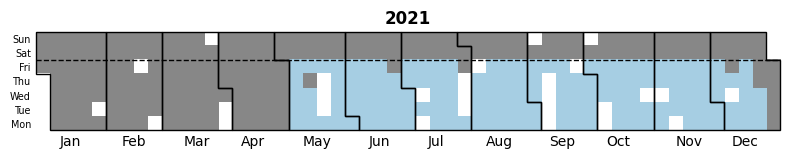

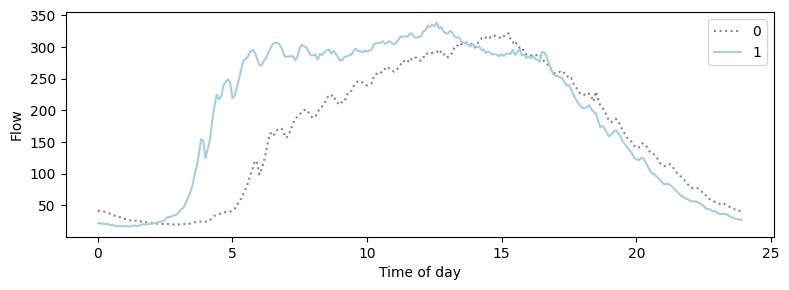

Silhouette Score: 0.30762127308637705
Davies-Bouldin Score: 1.2677249598188514
Calinski-Harabasz Score: 174.1048835493247
Prediction accuracy MAE: 32.57421525988162
Prediction accuracy MAPE: 0.44248197239664977
3
cluster_id_weekdays_share [134, 8, 94]
cluster_id_weekend_share [0, 75, 26]
111


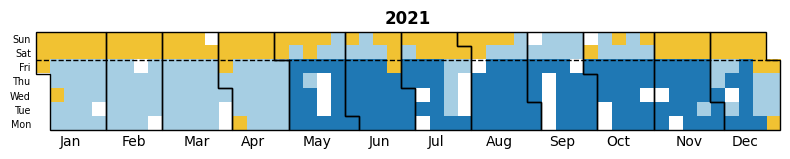

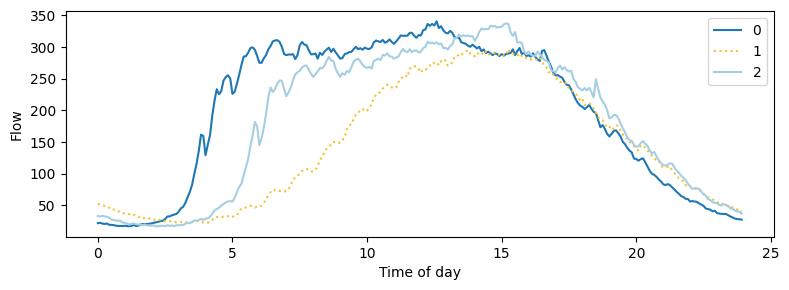

Silhouette Score: 0.2692406087798076
Davies-Bouldin Score: 1.3587890766043185
Calinski-Harabasz Score: 159.13421302277038
Prediction accuracy MAE: 31.39955930214274
Prediction accuracy MAPE: 0.40940719318368973
4
cluster_id_weekdays_share [135, 81, 14, 6]
cluster_id_weekend_share [0, 0, 56, 45]
111


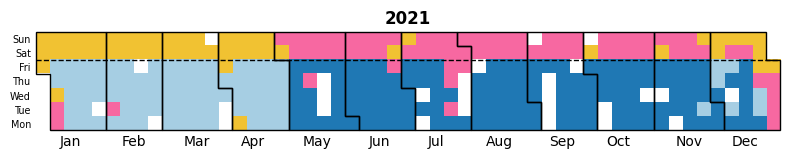

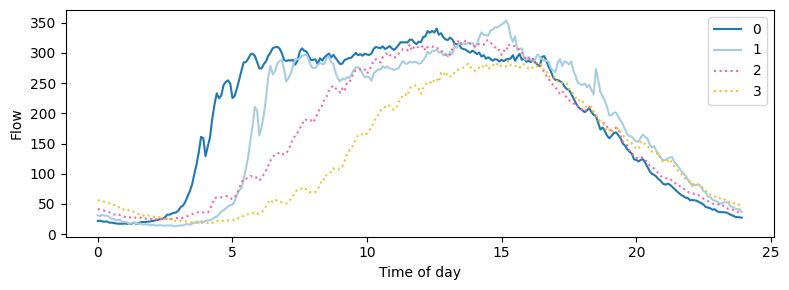

Silhouette Score: 0.255152329137449
Davies-Bouldin Score: 1.427505857181075
Calinski-Harabasz Score: 131.4862620417445
Prediction accuracy MAE: 30.123516116511627
Prediction accuracy MAPE: 0.39444482856870733
5
cluster_id_weekdays_share [92, 6, 99, 6, 33]
cluster_id_weekend_share [0, 51, 0, 42, 8]
111


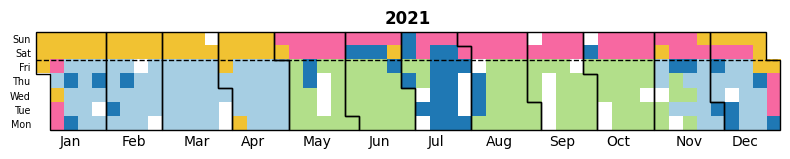

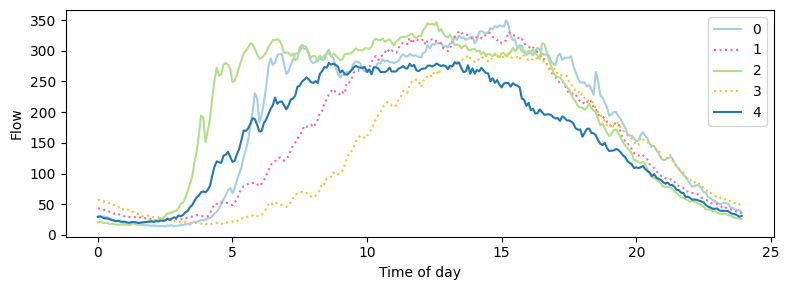

Silhouette Score: 0.24786557382858176
Davies-Bouldin Score: 1.514336299828091
Calinski-Harabasz Score: 114.73659623897154
Prediction accuracy MAE: 27.522039290183706
Prediction accuracy MAPE: 0.3560791901918416
6
cluster_id_weekdays_share [16, 19, 100, 1, 94, 6]
cluster_id_weekend_share [56, 0, 0, 2, 0, 43]
111


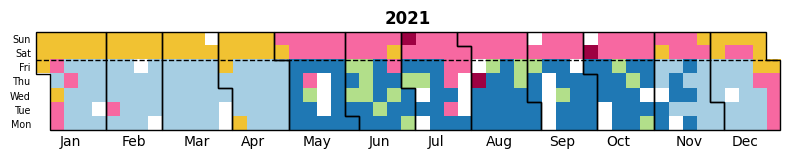

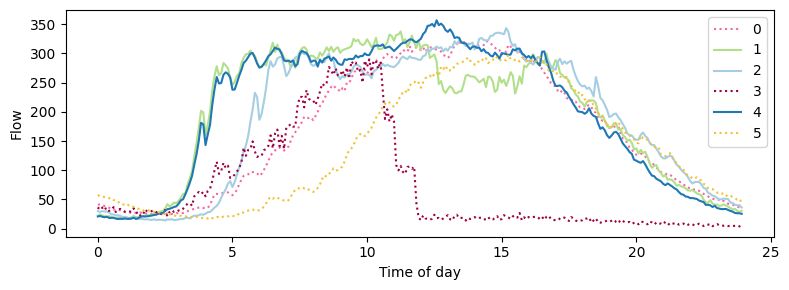

Silhouette Score: 0.19775895154584258
Davies-Bouldin Score: 1.670663013134642
Calinski-Harabasz Score: 103.04696045194878
Prediction accuracy MAE: 27.38568641714497
Prediction accuracy MAPE: 0.261529370892029
7
cluster_id_weekdays_share [74, 85, 6, 7, 1, 35, 28]
cluster_id_weekend_share [0, 0, 42, 57, 2, 0, 0]
111


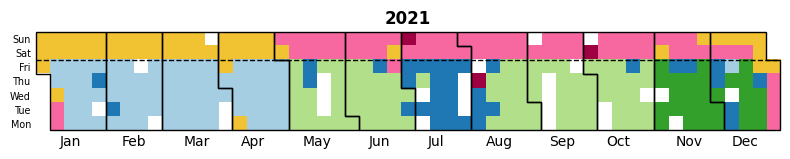

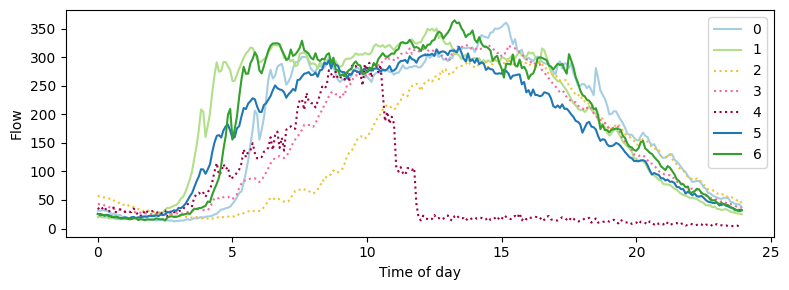

Silhouette Score: 0.24018203975358135
Davies-Bouldin Score: 1.4276231841798848
Calinski-Harabasz Score: 103.29984748335941
Prediction accuracy MAE: 25.337430095252266
Prediction accuracy MAPE: 0.2524429342806809
8
cluster_id_weekdays_share [1, 80, 8, 2, 34, 5, 74, 32]
cluster_id_weekend_share [35, 0, 48, 2, 0, 16, 0, 0]
111


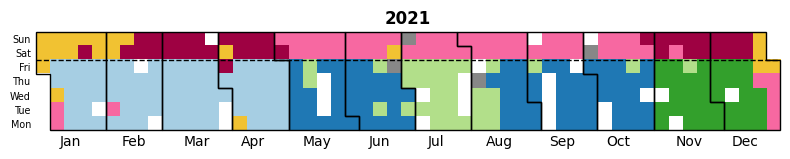

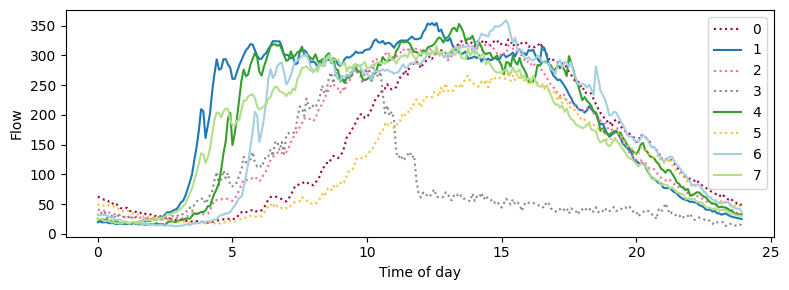

Silhouette Score: 0.20877519207266754
Davies-Bouldin Score: 1.5277277334247197
Calinski-Harabasz Score: 94.08918318940398
Prediction accuracy MAE: 24.58269624386226
Prediction accuracy MAPE: 0.2601084468253615
9
cluster_id_weekdays_share [70, 83, 4, 3, 0, 27, 13, 1, 35]
cluster_id_weekend_share [0, 0, 2, 37, 32, 0, 28, 2, 0]
111


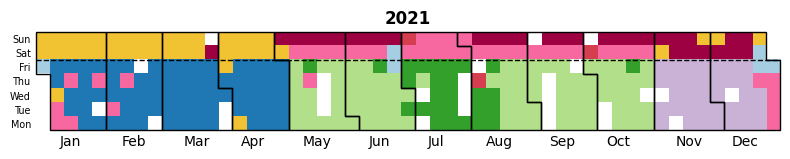

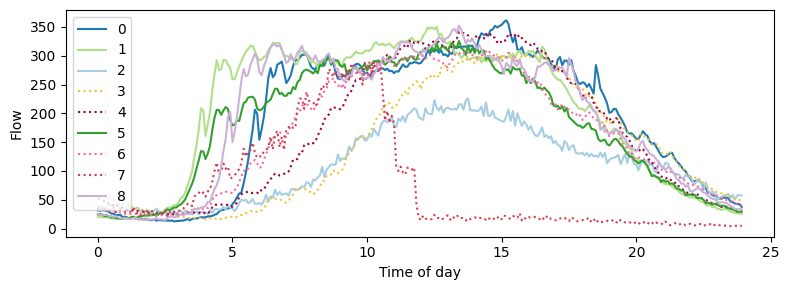

Silhouette Score: 0.20189504931082441
Davies-Bouldin Score: 1.5076187518534803
Calinski-Harabasz Score: 87.05863228389276
Prediction accuracy MAE: 24.428473125202274
Prediction accuracy MAPE: 0.2403387247230531


In [11]:
silhouetteArr=[]
daviesArr=[]
calinskiArr=[]
maeArr=[]
mapeArr=[]

# For DBSCAN
#for min_samples in range(2,10):
#  n_clusters=10

for n_clusters in range(2,10):

  print(n_clusters)

  clusters = None
  #print(np.where(nans_per_day > 0)[0])
  #nans_per_day=np.sum(np.isnan(vectorized_day_dataset),1)
  vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
  days_not_nans = days[np.where(nans_per_day == 0)[0]]

  # BELOW lines enables you to comment in and out clustering method you want to use note that GMM have different ouput and thus labels are extracted differently
  #clusters = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
  #clusters = AgglomerativeClustering(n_clusters=n_clusters,metric='euclidean', linkage='ward').fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
  #clusters = DBSCAN(eps=500, min_samples = min_samples).fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

  if clusters is not None:
    cluster_labels = clusters.labels_

  cluster_labels = GaussianMixture(n_components=n_clusters).fit(vectorized_day_dataset_no_nans).predict(vectorized_day_dataset_no_nans) #check the parameters at  https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_init.html#sphx-glr-auto-examples-mixture-plot-gmm-init-py


  from dateutil.relativedelta import relativedelta
  from matplotlib.patches import Polygon
  from matplotlib.lines import Line2D
  from matplotlib import gridspec
  from matplotlib.patches import Patch
  from matplotlib import colors

  def assign_colors(n_clusters, days, assigments):

      days_colors = []
      color_to_cluster = []
      style_to_cluster = []
      weekend_colors = ['#67001f','#d6604d','#fdae61','#f46d43','#d53e4f','#9e0142','#f768a1','#f1c232']#,'#fe9929','#cc4c02','#e31a1c','#737373','#bdbdbd','#252525','#bcbddc']
  #    weekend_school_colors = ['#c2a5cf','#f1b6da','#8e0152','#c51b7d','#de77ae','#ae017e','#fcc5c0','#e31a1c','#737373','#bdbdbd']
  #    bank_holidays_colors = ['#543005','#dfc27d','#bf812d','#8c510a']
      mixed_colors = ['#4d4d4d','#35978f','#bababa','#878787']
      weekday_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#cab2d6','#6a3d9a','#b15928','#8dd3c7','#bebada','#fb8072','#b3de69','#bc80bd','#fccde5','#ccebc5','#35978f','#80cdc1']

      cluster_id_weekdays_share = []
      cluster_id_weekend_share = []
      cluster_id_all_days = []

      for i in range(0,n_clusters):
          color_to_cluster.append(None)
          style_to_cluster.append(None)
          cluster_id_weekdays_share.append(0)
          cluster_id_weekend_share.append(0)
          cluster_id_all_days.append(0)

      for i in range(0,len(days)):
          #print(i,assigments[i],len(assigments),len(cluster_id_all_days))
          if assigments[i] is not None:
              cluster_id_all_days[assigments[i]] += 1
              if '-' in str(days[i]):
                  pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
              else:
                  pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')

              if int(pomT.weekday()) < 5:
                  cluster_id_weekdays_share[assigments[i]] += 1
              else:
                  cluster_id_weekend_share[assigments[i]] += 1

      print('cluster_id_weekdays_share',cluster_id_weekdays_share)
      print('cluster_id_weekend_share',cluster_id_weekend_share)
      for i in range(0,len(days)):
          if assigments[i] is not None:
              cluster_idx = assigments[i]
              if '-' in str(days[i]):
                  pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
              else:
                  pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
              if color_to_cluster[assigments[i]] is None:
                  if cluster_id_weekend_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                          color_to_cluster[assigments[i]] = weekend_colors.pop()
                          style_to_cluster[assigments[i]] = ':'
                  elif cluster_id_weekdays_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                          color_to_cluster[assigments[i]] = weekday_colors.pop(0)
                          style_to_cluster[assigments[i]] = '-'
                  else:
                      color_to_cluster[assigments[i]] = mixed_colors.pop()
                      style_to_cluster[assigments[i]] = ':'

              days_colors.append(color_to_cluster[assigments[i]])
          else:
              days_colors.append(None)

      return days_colors,color_to_cluster,style_to_cluster


  def calmap(ax, year, data, days, assigments, n_clusters,days_colors,color_to_cluster,
            limit_graphics=False):

      ax.tick_params('x', length=0, labelsize="medium", which='major')
      ax.tick_params('y', length=0, labelsize="x-small", which='major')

      # Month borders

      xticks, labels = [], []
      start = datetime.datetime(year,1,1).weekday()

      for month in range(1,13):

          first = datetime.datetime(year, month, 1)
          last = first + relativedelta(months=1, days=-1)

          y0 = first.weekday()
          y1 = last.weekday()
          x0 = (int(first.strftime("%j"))+start-1)//7
          x1 = (int(last.strftime("%j"))+start-1)//7

          P = [ (x0,   y0), (x0,    7),  (x1,   7),
                (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
                (x0+1,  0), (x0+1,  y0) ]

          xticks.append(x0 +(x1-x0+1)/2)
          labels.append(first.strftime("%b"))
          poly = Polygon(P, edgecolor="black", facecolor="None",

                        linewidth=1, zorder=20, clip_on=False)

          ax.add_artist(poly)

      line = Line2D([0,53],[5,5],linewidth=1, zorder = 20,color="black",linestyle='dashed')
      ax.add_artist(line)

      if not limit_graphics:
          ax.set_xticks(xticks)
          ax.set_xticklabels(labels)
          ax.set_yticks(0.5 + np.arange(7))
          ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
          ax.set_title("{}".format(year), weight="semibold")
      else:
          plt.tick_params(
              axis='x',          # changes apply to the x-axis
              which='both',      # both major and minor ticks are affected
              bottom=False,      # ticks along the bottom edge are off
              top=False,         # ticks along the top edge are off
              labelbottom=False)
          plt.tick_params(
              axis='y',          # changes apply to the x-axis
              which='both',      # both major and minor ticks are affected
              left=False,      # ticks along the bottom edge are off
              right=False,         # ticks along the top edge are off
              labelleft=False)

      # Clearing first and last day from the data
      valid = datetime.datetime(year, 1, 1).weekday()
      data[:valid,0] = np.nan
      valid = datetime.datetime(year, 12, 31).weekday()
      # data[:,x1+1:] = np.nan
      data[valid+1:,x1] = np.nan

      for i in range(0,len(days)):
          if '-' in str(days[i]):
              pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
          else:
              pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
          week_number = int(pomT.strftime("%W"))
          day_of_week = int(pomT.weekday())
          data[day_of_week,week_number] = assigments[i]


      act_date = datetime.datetime(year,1,1)
      while (act_date.year == year):

          week_number = int(act_date.strftime("%W"))
          day_of_week = int(act_date.weekday())
          doy_id = act_date.timetuple().tm_yday
          if doy_id<5 and week_number > 53:
              week_number = 0

          act_date = act_date + datetime.timedelta(days=1)

      #pomT = datetime.datetime.strptime('2017-01-01','%Y-%m-%d')
      #week_number = int(pomT.strftime("%V"))
      #day_of_week = int(pomT.weekday())
      #print(week_number,day_of_week)
      #doy_id = pomT.timetuple().tm_yday
      #if doy_id<5 and week_number > 0:
      #    week_number = 0
      #data[day_of_week,week_number] = len(clusters)+10

      # Showing data
      cmap = plt.cm.spring  # Can be any colormap that you want after the cm
      cmap.set_bad(color='white')

      #ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=0, vmax=len(clusters)+10,
      #          cmap=cmap, origin="lower", alpha=.75)

      cmap = colors.ListedColormap(color_to_cluster)
      bounds=[-0.1]
      step = 1
      for i in range(0,n_clusters):
          bounds.append(i-0.1+step)
      norm = colors.BoundaryNorm(bounds, cmap.N)
      #print(color_to_cluster)
    #print(bounds)
      #print(norm)

      #print(color_to_cluster)
      #print(bounds)
      #print(cmap)
      #exit(0)

      ax.imshow(data, extent=[0,53,0,7], zorder=10, interpolation='nearest', origin='lower',cmap=cmap, norm=norm)

  def make_calendar_visualization_figure(days,assigments,n_clusters,years,days_colors,color_to_cluster,
                                        save_figure: str = None, show_figure:bool = True, limit_graphics = False):

      fig = plt.figure(figsize=(8,1.5*len(years)), dpi=100)
      X = np.linspace(-1,1, 53*7)

      for i, obj in enumerate(years):

          pom_s = str(len(years))+'1'+str(i+1)
          print(pom_s)

          ax = plt.subplot(int(pom_s), xlim=[0, 53], ylim=[0, 7], frameon=False, aspect=1)
          I = 1.2 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
          I = I.reshape(53,7).T
          I.fill(np.nan)
          calmap(ax, int(obj), I.reshape(53,7).T, days, assigments, n_clusters,days_colors,color_to_cluster, limit_graphics)

      #   ax = plt.subplot(212, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
      #  I = 1.1 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
      #   calmap(ax, 2018, I.reshape(53,7).T)

      #ax = plt.subplot(313, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
      #I = 1.0 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
      #calmap(ax, 2019, I.reshape(53,7).T)
      if save_figure:
          plt.savefig(save_figure)

      if show_figure or save_figure is None:
          plt.tight_layout()
          plt.show()

  def make_figure_centroids(x,y,color_to_cluster,style_to_cluster,cluster_ids,minY = None,maxY = None,
                            save_figure: str = None, show_figure:bool = True):

      #print(color_to_cluster)
      fig = plt.figure(figsize=(8,3))
      ax = fig.add_subplot(111)
      for i in range(0,len(x)):
          #print(i,color_to_cluster[i],style_to_cluster[i])
          #print(y[i])
          ax.plot(x[i],y[i],style_to_cluster[i], color=color_to_cluster[i], label=str(cluster_ids[i]))
      ax.set_xlabel('Time of day')
      ax.set_ylabel('Flow')
      if minY is not None and maxY is not None:
          ax.set_ylim([minY, maxY])
      plt.legend()

      if save_figure:
          plt.savefig(save_figure)

      if show_figure or save_figure is None:
          plt.tight_layout()
          plt.show()

    # Calculate the number of clusters by finding unique values in 'cluster_labels'
  n_clusters_t = len(np.unique(cluster_labels))

  # Assign colors to days based on clusters
  days_colors, color_to_cluster, style_to_cluster = assign_colors(n_clusters_t, days_not_nans, cluster_labels)
  # The function 'assign_colors' is used to determine colors and styles for visualization.

  # Create a calendar visualization figure
  make_calendar_visualization_figure(days_not_nans, cluster_labels, n_clusters_t, [2021], days_colors,
                                    color_to_cluster, save_figure=None)
  # This function 'make_calendar_visualization_figure' is used to generate a visualization based on the provided data and parameters.
  # 'days_not_nans' are the days, 'cluster_labels' are the cluster labels, 'n_clusters_t' is the number of clusters,
  # '[2021]' represents the year, 'days_colors' represent the assigned colors for each day, 'color_to_cluster' maps colors to clusters,
  # and 'save_figure' is an optional parameter to save the generated figure (can be None if not saving).


  # Initialize empty lists to store centroid data
  centroids_xx = []  # x-axis values for centroids
  centroids_yy_daytypes = []  # y-axis values for centroids, grouped by day types
  cluster_ids = []  # Cluster IDs

  # Iterate through each cluster
  for i in range(0, n_clusters_t):
      # Store the x-axis values for centroids (hours of the day)
      centroids_xx.append(x_axis_hours)

      # Calculate the y-axis values for centroids (average flow for each 5-minute interval)
      centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())
      centroids_yy_daytypes.append(centroid_yy)

      # Store the cluster ID
      cluster_ids.append(i)

  # Generate a figure displaying the centroids
  make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster, style_to_cluster, cluster_ids)
  # The function 'make_figure_centroids' is used to create a visualization of the centroids,
  # with the provided data and parameters.


        # Import relevant metrics from scikit-learn
  from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

  # Calculate the Silhouette Score
  SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels)
  # Silhouette Score measures the quality of clusters, higher values indicate better separation.

  # Calculate the Davies-Bouldin Score
  DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels)
  # Davies-Bouldin Score measures the average similarity between each cluster and its most similar cluster, lower values indicate better separation.

  # Calculate the Calinski-Harabasz Score
  CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels)
  # Calinski-Harabasz Score measures the ratio of between-cluster variance to within-cluster variance, higher values indicate better separation.



  # Print the computed cluster quality scores
  print('Silhouette Score:', SC_score)
  print('Davies-Bouldin Score:', DB_score)
  print('Calinski-Harabasz Score:', CH_score)

      # Read the evaluation dataset from a CSV file
  data_eval_df = pd.read_csv("evaluation_dataset_exercise_5_clustering_highway_traffic.csv", sep=";")

  # Sort the evaluation DataFrame by columns "Date" and "Interval_5"
  data_eval_df.sort_values(["Date", "Interval_5"])

  # Extract unique dates from the sorted evaluation DataFrame
  days_eval = np.unique(data_eval_df[['Date']].values.ravel())
  # Calculate the total number of unique days in the evaluation dataset
  ndays_eval = len(days_eval)

  # Group the evaluation DataFrame by the "Date" column
  day_eval_subsets_df = data_eval_df.groupby(["Date"])

  # Initialize a matrix 'vectorized_day_dataset_eval' filled with NaN values
  vectorized_day_dataset_eval = np.zeros((ndays_eval, nintvals))
  vectorized_day_dataset_eval.fill(np.nan)
  # This section initializes a 2D array to store the evaluation dataset and fills it with NaN values.

  # Loop through each unique day in the evaluation dataset
  for i in range(0, ndays_eval):
      # Get the DataFrame corresponding to the current day
      df_t = day_eval_subsets_df.get_group(days_eval[i])

      # Loop through each row in the current day's DataFrame
      for j in range(len(df_t)):
          # Get the current day's DataFrame (this line is redundant)
          df_t = day_eval_subsets_df.get_group(days_eval[i])

          # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset_eval'
          vectorized_day_dataset_eval[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

  # Print the resulting 'vectorized_day_dataset_eval'
  #print(vectorized_day_dataset_eval)

      # Calculate the total number of NaN values in the evaluation dataset
  #print('Number of NaNs:', np.sum(np.isnan(vectorized_day_dataset_eval)))

  # Calculate the rate of NaN values in the evaluation dataset
  #print('Rate of NaNs:', np.sum(np.isnan(vectorized_day_dataset_eval)) / (ndays_eval * nintvals))

  # Calculate the number of days with missing values
  nans_per_day_eval = np.sum(np.isnan(vectorized_day_dataset_eval), 1)
  #print('Number of days with missing values:', np.size(np.where(nans_per_day_eval > 0)))

  # Filter out days with no missing values and create a new dataset
  vectorized_day_dataset_no_nans_eval = vectorized_day_dataset_eval[np.where(nans_per_day_eval == 0)[0], :]
  days_not_nans_eval = days_eval[np.where(nans_per_day_eval == 0)[0]]

  # Calculate the final number of days in the evaluation dataset after removing missing values
  #print('Final number of days in evaluation dataset:', len(days_not_nans_eval))

  # Print the list of days in the evaluation dataset with no missing values
  #print('List of days without missing values:', days_not_nans_eval)

  # Calculate the total number of days in the filtered evaluation dataset
  ndays_eval_not_nans = len(days_not_nans_eval)

      # Import the pairwise_distances function from scikit-learn's metrics library
  import sklearn.metrics.pairwise as dis_lib

  # Define a function to find the closest centroid to a new data point within a specified day-time interval range
  def find_the_closest_centroid(centroids, new_day, from_interval: int, to_interval: int):
      closest_centroid = None
      closest_dist = None

      # Iterate through each centroid
      for i in range(0, len(centroids)):

          # Calculate the Euclidean distance between the centroid and the new data point
          ed_t = dis_lib.paired_distances(centroids[i], new_day, metric='euclidean')

          # Check if the current centroid is closer than the previously closest one
          if closest_centroid is None or closest_dist > ed_t:
              closest_centroid = i
              closest_dist = ed_t

      return closest_centroid

  # Initialize a list to store centroid data
  centroids = []

  # Calculate centroids for each cluster
  for i in np.unique(cluster_labels):
      centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).reshape(1, nintvals)
      centroids.append(centroid)

  # Define the number of past intervals to consider for classification
  n_past_intervals_for_classification = 5

  # Initialize variables to calculate accuracy metrics
  total_mae = 0
  total_mape = 0
  prediction_counts = 0

  # Loop through each day in the evaluation dataset with no missing values
  for i in range(0, ndays_eval_not_nans):
      # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
      for j in range(n_past_intervals_for_classification, nintvals - 1):
          # Find the closest centroid for the current data point
          centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

          # Predict the value for the next interval
          predicted_value = centroids[centroid_index][0, j + 1]

          # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
          mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
          mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

          # Accumulate MAE, MAPE, and count of predictions
          total_mae += mae_t
          total_mape += mape_t
          prediction_counts += 1

  # Calculate and print the prediction accuracy metrics
  print('Prediction accuracy MAE:', total_mae / prediction_counts)
  print('Prediction accuracy MAPE:', total_mape / prediction_counts)

  silhouetteArr.append(SC_score)
  daviesArr.append(DB_score)
  calinskiArr.append(CH_score)
  maeArr.append(total_mae / prediction_counts)
  mapeArr.append(total_mape / prediction_counts)




## Evaluations

In [12]:
print(silhouetteArr)
print(daviesArr)
print(calinskiArr)
print(maeArr)
print(mapeArr)

[0.30762127308637705, 0.2692406087798076, 0.255152329137449, 0.24786557382858176, 0.19775895154584258, 0.24018203975358135, 0.20877519207266754, 0.20189504931082441]
[1.2677249598188514, 1.3587890766043185, 1.427505857181075, 1.514336299828091, 1.670663013134642, 1.4276231841798848, 1.5277277334247197, 1.5076187518534803]
[174.1048835493247, 159.13421302277038, 131.4862620417445, 114.73659623897154, 103.04696045194878, 103.29984748335941, 94.08918318940398, 87.05863228389276]
[32.57421525988162, 31.39955930214274, 30.123516116511627, 27.522039290183706, 27.38568641714497, 25.337430095252266, 24.58269624386226, 24.428473125202274]
[0.44248197239664977, 0.40940719318368973, 0.39444482856870733, 0.3560791901918416, 0.261529370892029, 0.2524429342806809, 0.2601084468253615, 0.2403387247230531]


In [13]:
silhouetteArr_Kmeans=[0.30762127308637705, 0.2692406087798076, 0.22986034355640078, 0.22969753927464953, 0.23960093549116207, 0.24133229796735856, 0.22463500306883655, 0.21671483432113664]
daviesArr_Kmeans=[1.2677249598188514, 1.3587890766043185, 1.7896752477080542, 1.5158295908096302, 1.4549397566884494, 1.4813566163658227, 1.575806362434243, 1.6765992719650034]
calinskiArr_Kmeans=[174.1048835493247, 159.13421302277044, 122.80161679824757, 114.69473802964785, 115.18521464607787, 103.05063003488681, 94.88778484376417, 86.61554755105767]
maeArr_Kmeans=[32.57421525988162, 31.39955930214274, 28.907917690806787, 27.619317805790065, 25.954519894405593, 25.32641523281189, 24.814128357783055, 24.553252365960734]
mapeArr_Kmeans=[0.44248197239664977, 0.40940719318368973, 0.38827596645343576, 0.2773115163252373, 0.25998120578166506, 0.25373071230363786, 0.24671258798480053, 0.24443885682212785]

In [14]:
silhouetteArr_Agglomerative=[0.29094541701496657, 0.26811197169820694, 0.2576366497624237, 0.26377798541725606, 0.2503631303750926, 0.24315720694085063, 0.23963521944269484, 0.23303907496992507]
daviesArr_Agglomerative=[1.279138038132245, 1.3138114813630588, 1.4602740784111685, 1.2314039157719159, 1.4601712668312148, 1.5136059986976242, 1.4405336809825915, 1.3906874724813028]
calinskiArr_Agglomerative=[159.8215045200973, 148.6076053377012, 127.1871520011372, 118.05469625253788, 108.67950551006747, 100.74968399031134, 91.73657248722878, 84.41241965790472]
maeArr_Agglomerative=[32.536602667947164, 30.988773246088606, 30.2079004369723, 28.65384718437549, 25.837364587959446, 24.767895406358022, 24.801209821915926, 24.434278017665733]
mapeArr_Agglomerative=[0.4462548740808854, 0.4170420468469859, 0.4020956386730881, 0.29082985204795475, 0.25213739808976465, 0.25017379103102816, 0.23961158835129007, 0.23675717603035423]

In [15]:
silhouetteArr_DBSCAN=[-0.02772100330028316, -0.02772100330028316, -0.08626688979370234, -0.03292934109604593, -0.05216977160448344, -0.06128715206200303, -0.13916309577442068, -0.19509212961837127]
daviesArr_DBSCAN=[2.3795720914163345, 2.3795720914163345, 2.167100015154176, 2.308556400819551, 2.2717313768244636, 2.2395617894619044, 2.2292786238799804, 2.196664697496179]
calinskiArr_DBSCAN=[35.327906331751436, 35.327906331751436, 29.590313849579786, 39.48673277064966, 36.472096203738985, 35.709451411496815, 23.205504200863786, 19.521884288405474]
maeArr_DBSCAN=[26.23680191809368, 26.23680191809368, 27.339695666325852, 27.478401608971097, 27.61227861632552, 27.67534931335502, 27.276499632303885, 27.749148463165195]
mapeArr_DBSCAN=[0.35889508773131146, 0.35889508773131146, 0.37536990616717464, 0.3772260274809025, 0.376882339968964, 0.3773048268304898, 0.37480053718853057, 0.3791635185745864]

In [16]:
silhouetteArr_GMM=[0.3022832884402729, 0.2692406087798076, 0.2565350238954938, 0.2180545976276197, 0.23801977559280704, 0.2130935961425968, 0.19399196502320457, 0.20018226512442913]
daviesArr_GMM=[1.2687012250940783, 1.3587890766043182, 1.4117692122259684, 1.4748268592590112, 1.4588112895829763, 1.6110645675544861, 1.6963300548899345, 1.6723355994600357]
calinskiArr_GMM=[169.80547920139276, 159.13421302277044, 131.41530435438233, 114.97940090214487, 115.24093891921548, 102.16683454408778, 92.11671948184498, 86.45745676858834]
maeArr_GMM=[33.73629984111076, 31.39955930214274, 30.303360022043442, 27.32995238095042, 26.014218568130723, 25.747174520519124, 24.777473901348085, 24.54819354746889]
mapeArr_GMM=[0.4270703863380739, 0.40940719318368973, 0.3956612066528527, 0.2682552438077605, 0.259832811820551, 0.2706203383334541, 0.24702962014621446, 0.24230668394781502]

Text(0.5, 1.0, 'MAPE K-means')

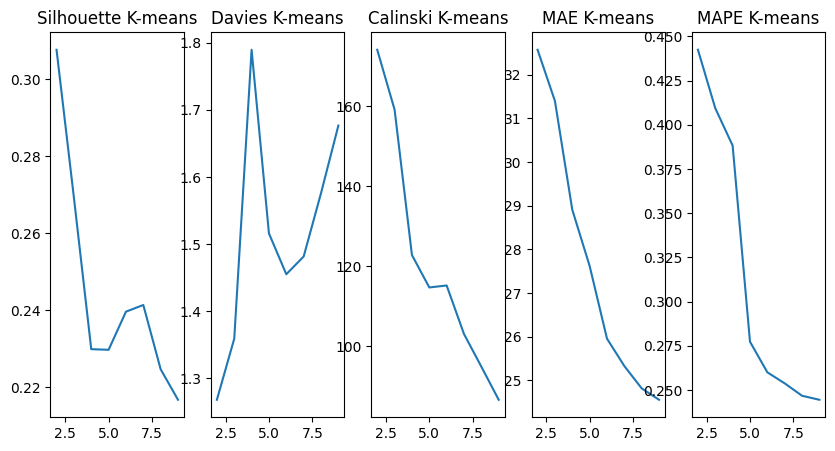

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.subplot(1, 5, 1)
plt.plot(range(2,10),silhouetteArr_Kmeans,linestyle='-')
plt.title('Silhouette K-means')

plt.subplot(1, 5, 2)
plt.plot(range(2,10),daviesArr_Kmeans,linestyle='-')
plt.title('Davies K-means')

plt.subplot(1, 5, 3)
plt.plot(range(2,10),calinskiArr_Kmeans,linestyle='-')
plt.title('Calinski K-means')

plt.subplot(1, 5, 4)
plt.plot(range(2,10),maeArr_Kmeans,linestyle='-')
plt.title('MAE K-means')

plt.subplot(1, 5, 5)
plt.plot(range(2,10),mapeArr_Kmeans,linestyle='-')
plt.title('MAPE K-means')

Text(0.5, 1.0, 'MAPE Agglomerative')

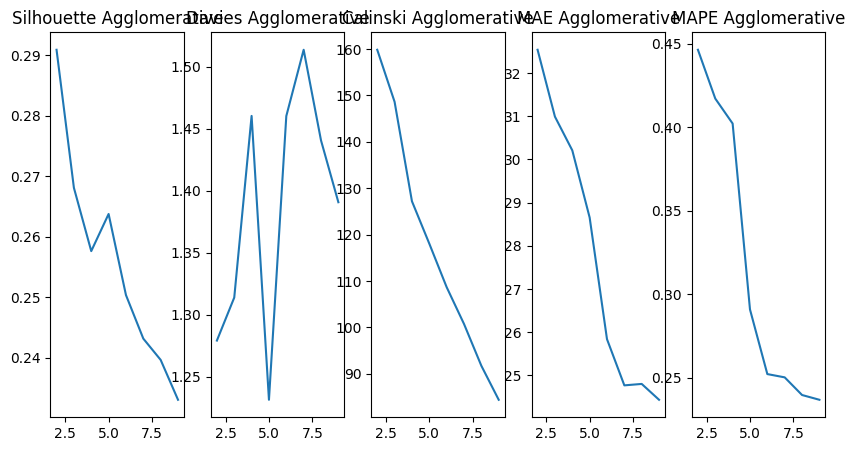

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 5, 1)
plt.plot(range(2,10),silhouetteArr_Agglomerative,linestyle='-')
plt.title('Silhouette Agglomerative')

plt.subplot(1, 5, 2)
plt.plot(range(2,10),daviesArr_Agglomerative,linestyle='-')
plt.title('Davies Agglomerative')

plt.subplot(1, 5, 3)
plt.plot(range(2,10),calinskiArr_Agglomerative,linestyle='-')
plt.title('Calinski Agglomerative')

plt.subplot(1, 5, 4)
plt.plot(range(2,10),maeArr_Agglomerative,linestyle='-')
plt.title('MAE Agglomerative')

plt.subplot(1, 5, 5)
plt.plot(range(2,10),mapeArr_Agglomerative,linestyle='-')
plt.title('MAPE Agglomerative')

Text(0.5, 1.0, 'MAPE DBSCAN')

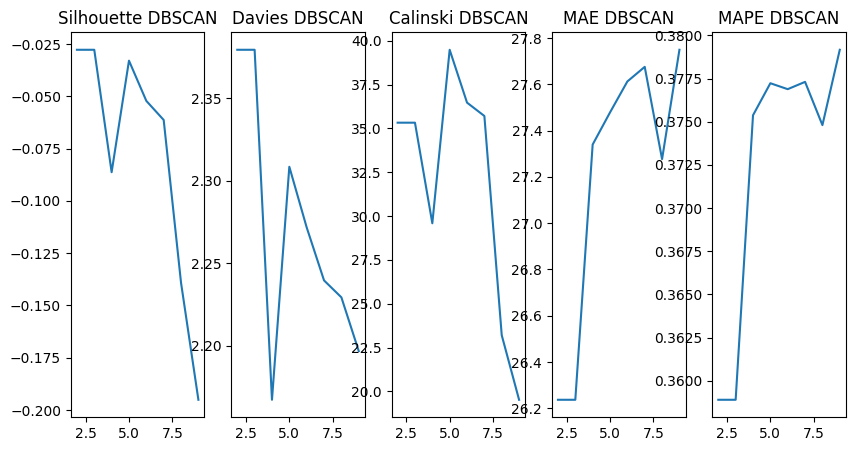

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 5, 1)
plt.plot(range(2,10),silhouetteArr_DBSCAN,linestyle='-')
plt.title('Silhouette DBSCAN')

plt.subplot(1, 5, 2)
plt.plot(range(2,10),daviesArr_DBSCAN,linestyle='-')
plt.title('Davies DBSCAN')

plt.subplot(1, 5, 3)
plt.plot(range(2,10),calinskiArr_DBSCAN,linestyle='-')
plt.title('Calinski DBSCAN')

plt.subplot(1, 5, 4)
plt.plot(range(2,10),maeArr_DBSCAN,linestyle='-')
plt.title('MAE DBSCAN')

plt.subplot(1, 5, 5)
plt.plot(range(2,10),mapeArr_DBSCAN,linestyle='-')
plt.title('MAPE DBSCAN')

Text(0.5, 1.0, 'MAPE GMM')

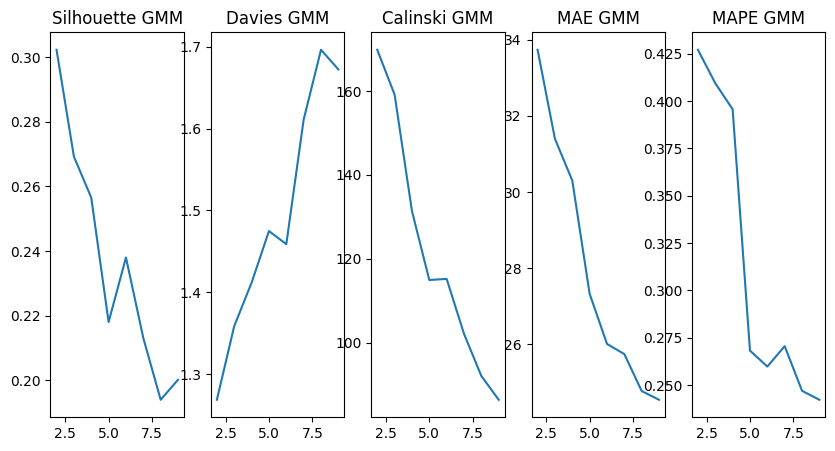

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 5, 1)
plt.plot(range(2,10),silhouetteArr_GMM,linestyle='-')
plt.title('Silhouette GMM')

plt.subplot(1, 5, 2)
plt.plot(range(2,10),daviesArr_GMM,linestyle='-')
plt.title('Davies GMM')

plt.subplot(1, 5, 3)
plt.plot(range(2,10),calinskiArr_GMM,linestyle='-')
plt.title('Calinski GMM')

plt.subplot(1, 5, 4)
plt.plot(range(2,10),maeArr_GMM,linestyle='-')
plt.title('MAE GMM')

plt.subplot(1, 5, 5)
plt.plot(range(2,10),mapeArr_GMM,linestyle='-')
plt.title('MAPE GMM')